In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
# Data
folds = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]
methods = ["MIGHT", "SPO-MIGHT", "SPORF"]
data = {
    "MIGHT": [0.271, 0.236, 0.258, 0.406, 0.262],
    "SPO-MIGHT": [0.249, 0.354, 0.192, 0.437, 0.323],
    "SPORF": [0.358, 0.384, 0.266, 0.489, 0.467],
}
df = pd.DataFrame(data, index=folds)

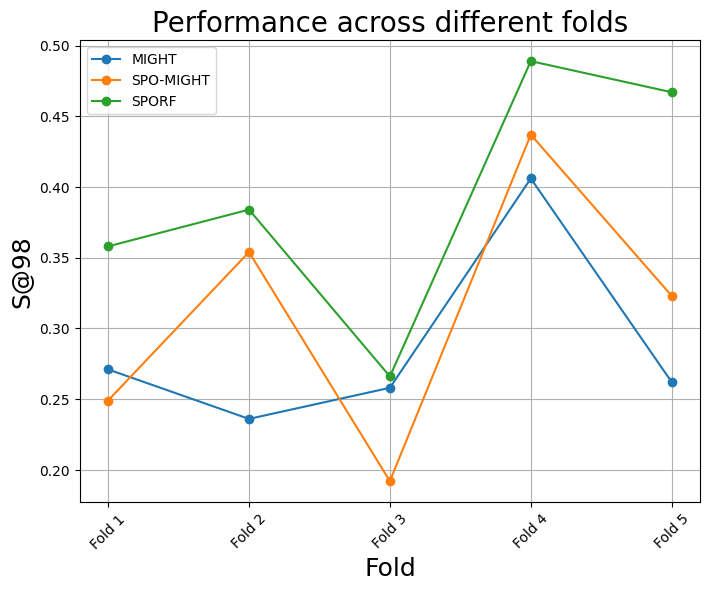

In [12]:
# Line plot
plt.figure(figsize=(8, 6))
for method in methods:
    plt.plot(folds, df[method], marker='o', linestyle='-', label=method)

plt.xlabel("Fold", fontsize=18)
plt.ylabel("S@98", fontsize=18)
plt.title("Performance across different folds", fontsize=20)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

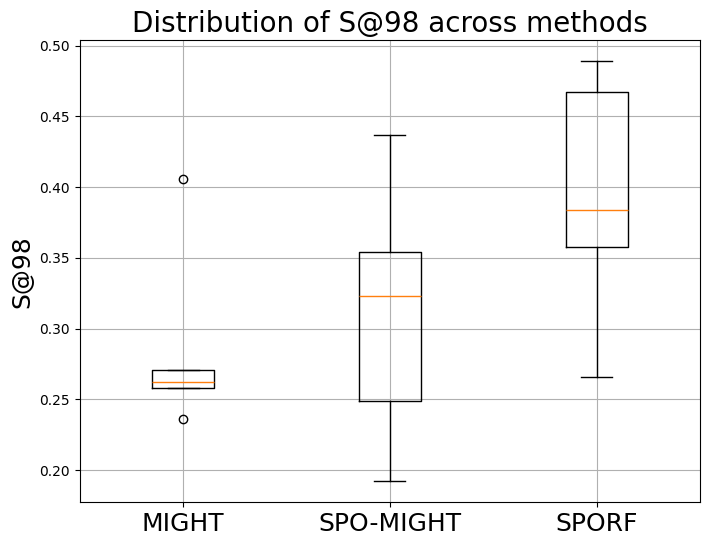

In [14]:
# Box plot
# Xlabel fontsize 20
plt.figure(figsize=(8, 6))
plt.boxplot([df[method] for method in methods], tick_labels=methods)
plt.xticks(fontsize=18)
plt.ylabel("S@98", fontsize=18)
plt.title("Distribution of S@98 across methods", fontsize=20)
plt.grid(True)
plt.show()